In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("../data/dataset_laporan_iklim_harian.csv")
df.columns

Index(['TANGGAL', 'TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'FF_X', 'FF_AVG'], dtype='object')

In [ ]:
# Daftar kolom numerik iklim
climate_cols = ["TN", "TX", "TAVG", "RH_AVG", "RR", "FF_X", "FF_AVG"]

# Replace nilai invalid BMKG
df[climate_cols] = df[climate_cols].replace([8888, 9999], np.nan)

In [ ]:
# Convert tanggal ke format datetime dengan dayfirst=True
# Penjelasan: Data tanggal menggunakan format dd-mm-yyyy, sehingga perlu menambahkan dayfirst=True

df["TANGGAL"] = pd.to_datetime(df["TANGGAL"], dayfirst=True)

# Set sebagai index (best practice time-series)
df = df.set_index("TANGGAL")

In [ ]:
# 0 dianggap error untuk fitur-fitur ini
zero_as_nan_cols = ["TN", "TX", "TAVG", "RH_AVG", "FF_X", "FF_AVG"]

for col in zero_as_nan_cols:
    df.loc[df[col] == 0, col] = np.nan

In [ ]:
df.shape

(730, 7)

In [ ]:
# Info umum dataset
print("\n== Info Dataset ==")
df.info()

# Menampilkan 10 baris pertama dataset
print("\n== 10 Baris Pertama Dataset ==")
df.head(20)


== Info Dataset ==
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2024-02-02 to 2026-01-31
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TN      725 non-null    float64
 1   TX      725 non-null    float64
 2   TAVG    729 non-null    float64
 3   RH_AVG  729 non-null    float64
 4   RR      661 non-null    float64
 5   FF_X    730 non-null    float64
 6   FF_AVG  726 non-null    float64
dtypes: float64(7)
memory usage: 45.6 KB

== 10 Baris Pertama Dataset ==


,TN,TX,TAVG,RH_AVG,RR,FF_X,FF_AVG
TANGGAL,,,,,,,
2024-02-02,24.2,29.0,26.3,85.0,0.0,4.0,2.0
2024-02-03,23.6,31.7,28.0,79.0,3.9,5.0,2.0
2024-02-04,24.1,30.6,27.8,81.0,1.5,4.0,2.0
2024-02-05,23.2,31.5,28.9,74.0,16.3,5.0,3.0
2024-02-06,24.2,30.0,27.2,83.0,0.0,5.0,1.0
2024-02-07,24.0,31.0,26.5,80.0,NaN,4.0,2.0
2024-02-08,23.2,31.4,28.3,74.0,15.6,3.0,1.0
2024-02-09,24.0,31.7,29.2,73.0,0.0,5.0,2.0
2024-02-10,24.2,30.0,27.4,82.0,0.0,3.0,2.0


In [ ]:
# Statistik deskriptif
print("\n== Statistik Deskriptif ==")
df.describe()


== Statistik Deskriptif ==


,TN,TX,TAVG,RH_AVG,RR,FF_X,FF_AVG
count,725.000000,725.000000,729.000000,729.000000,661.000000,730.000000,726.000000
mean,23.247172,31.325103,26.865295,82.137174,8.544175,4.471233,1.907713
std,1.172243,1.341612,1.334780,6.283185,17.999056,1.451500,0.695619
min,18.400000,24.600000,23.200000,63.000000,0.000000,2.000000,1.000000
25%,22.800000,30.600000,26.000000,78.000000,0.000000,4.000000,1.000000
50%,23.400000,31.400000,26.700000,83.000000,0.000000,4.000000,2.000000
75%,24.000000,32.200000,27.700000,87.000000,8.700000,5.000000,2.000000
max,25.600000,36.800000,30.500000,97.000000,145.200000,13.000000,6.000000


In [ ]:
# Cek missing values
print("\n== Cek Missing Values ==")
df.isnull().sum()


== Cek Missing Values ==


TN         5
TX         5
TAVG       1
RH_AVG     1
RR        69
FF_X       0
FF_AVG     4
dtype: int64

In [ ]:
(df == 0).sum()

TN          0
TX          0
TAVG        0
RH_AVG      0
RR        337
FF_X        0
FF_AVG      0
dtype: int64

In [ ]:
# cek duplikasi data
df.duplicated().sum()

np.int64(0)

In [ ]:
df_clean = df.interpolate(method="time")
df_clean.shape

(730, 7)

In [ ]:
df_clean["RR"] = df_clean["RR"].fillna(0)

In [ ]:
df_clean.isna().sum()

TN        0
TX        0
TAVG      0
RH_AVG    0
RR        0
FF_X      0
FF_AVG    0
dtype: int64

In [ ]:
df_clean.isnull().sum()

TN        0
TX        0
TAVG      0
RH_AVG    0
RR        0
FF_X      0
FF_AVG    0
dtype: int64

In [ ]:
df_clean.head(20)

,TN,TX,TAVG,RH_AVG,RR,FF_X,FF_AVG
TANGGAL,,,,,,,
2024-02-02,24.2,29.0,26.3,85.0,0.0,4.0,2.0
2024-02-03,23.6,31.7,28.0,79.0,3.9,5.0,2.0
2024-02-04,24.1,30.6,27.8,81.0,1.5,4.0,2.0
2024-02-05,23.2,31.5,28.9,74.0,16.3,5.0,3.0
2024-02-06,24.2,30.0,27.2,83.0,0.0,5.0,1.0
2024-02-07,24.0,31.0,26.5,80.0,7.8,4.0,2.0
2024-02-08,23.2,31.4,28.3,74.0,15.6,3.0,1.0
2024-02-09,24.0,31.7,29.2,73.0,0.0,5.0,2.0
2024-02-10,24.2,30.0,27.4,82.0,0.0,3.0,2.0


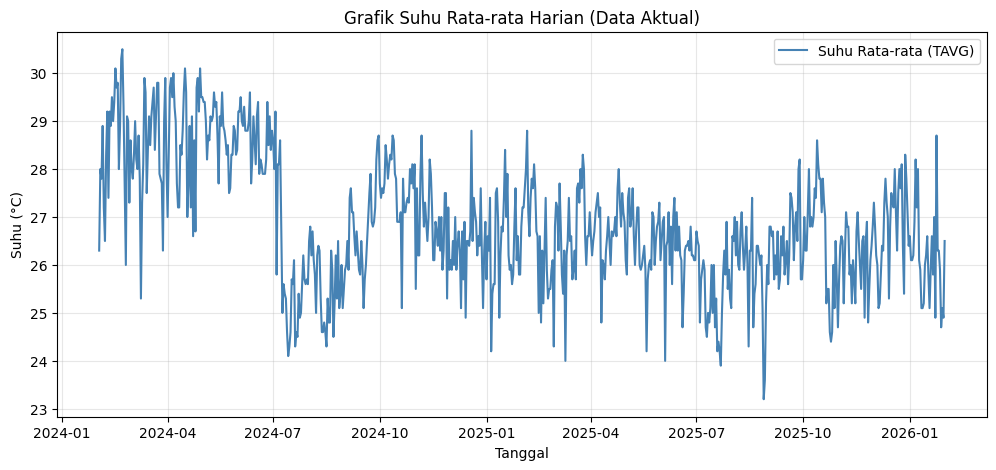

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df_clean.index, df_clean['TAVG'], label='Suhu Rata-rata (TAVG)', color='steelblue')
plt.title('Grafik Suhu Rata-rata Harian (Data Aktual)')
plt.xlabel('Tanggal')
plt.ylabel('Suhu (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# --- PERBAIKAN: IMPORT LIBRARY DULU ---
import datetime as dt    # <--- Tambahkan baris ini agar 'dt' dikenali
from sklearn.model_selection import train_test_split

# Copy data agar data asli aman
df_model = df_clean.copy()

# 1. Feature Engineering
# Linear Regression butuh angka. Kita ubah Index Tanggal menjadi "Ordinal Number"
# Sekarang 'dt' sudah dikenali, jadi kode ini akan jalan lancar
df_model['Date_Ordinal'] = df_model.index.map(dt.datetime.toordinal)

# 2. Tentukan Fitur (X) dan Target (y)
X = df_model[['Date_Ordinal']] # Input: Waktu
y = df_model['TAVG']           # Output: Suhu

# 3. Split Data (Latih & Uji)
# shuffle=False WAJIB untuk data Time Series (urut waktu tidak boleh diacak)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"Data Latih: {len(X_train)} hari")
print(f"Data Uji  : {len(X_test)} hari")

Data Latih: 584 hari
Data Uji  : 146 hari


In [ ]:
# --- PERBAIKAN: TAMBAHKAN IMPORT LIBRARY DI SINI ---
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# 1. Training Model
model = LinearRegression()
model.fit(X_train, y_train)

# 2. Cek Tren (Slope)
slope = model.coef_[0]
print(f"✅ Model Dilatih. Koefisien Tren: {slope:.5f}")

if slope > 0:
    print("👉 Analisis: Tren suhu menanjak (Memanas).")
else:
    print("👉 Analisis: Tren suhu menurun (Mendingin).")

# 3. Evaluasi Error (MAE)
prediksi_test = model.predict(X_test)
mae = mean_absolute_error(y_test, prediksi_test)
print(f"👉 Rata-rata Meleset (MAE): {mae:.3f} °C")

✅ Model Dilatih. Koefisien Tren: -0.00471
👉 Analisis: Tren suhu menurun (Mendingin).
👉 Rata-rata Meleset (MAE): 1.257 °C


c:\Users\sumar\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\sumar\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


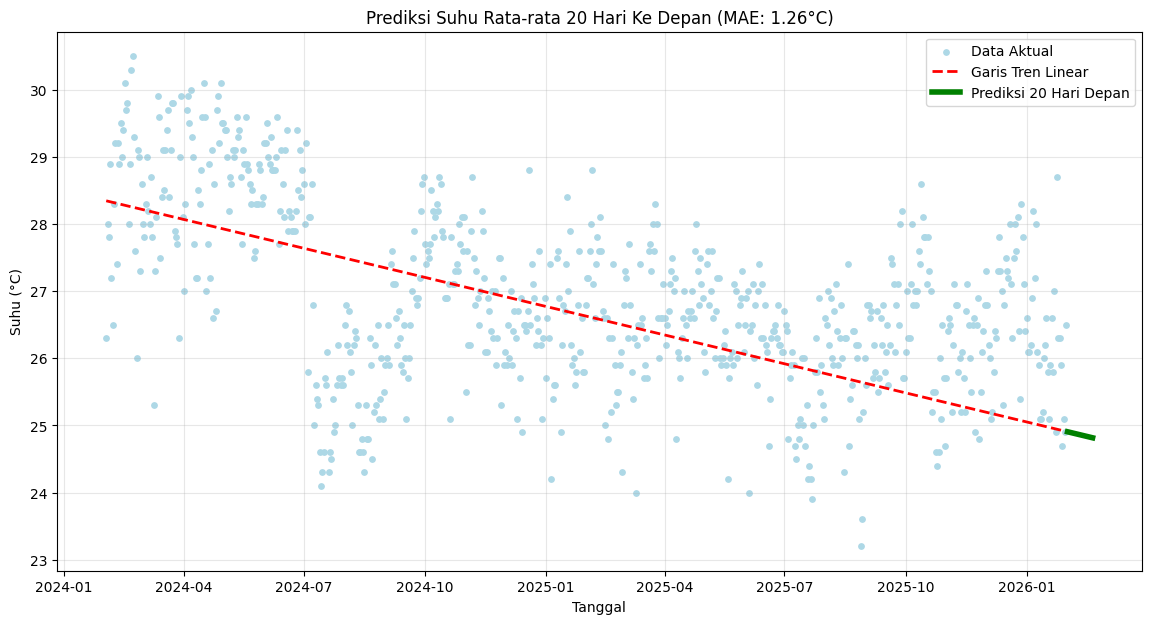

Tabel Prediksi 20 Hari:
      Tanggal  Prediksi_Suhu
0  2026-02-01      24.905001
1  2026-02-02      24.900287
2  2026-02-03      24.895574
3  2026-02-04      24.890860
4  2026-02-05      24.886147
5  2026-02-06      24.881433
6  2026-02-07      24.876719
7  2026-02-08      24.872006
8  2026-02-09      24.867292
9  2026-02-10      24.862579
10 2026-02-11      24.857865
11 2026-02-12      24.853151
12 2026-02-13      24.848438
13 2026-02-14      24.843724
14 2026-02-15      24.839011
15 2026-02-16      24.834297
16 2026-02-17      24.829583
17 2026-02-18      24.824870
18 2026-02-19      24.820156
19 2026-02-20      24.815442


In [ ]:
# 1. Buat Tanggal Masa Depan (20 Hari setelah data terakhir)
last_date = df_clean.index[-1]
future_days = 200  # <--- UBAH DI SINI
future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, future_days + 1)]

# Ubah tanggal masa depan jadi angka ordinal
future_ordinal = np.array([[d.toordinal()] for d in future_dates])

# 2. Lakukan Prediksi
future_pred = model.predict(future_ordinal)

# 3. Visualisasi Gabungan
plt.figure(figsize=(14, 7))

# Plot A: Data Asli (Biru)
plt.scatter(df_clean.index, df_clean['TAVG'], color='lightblue', s=15, label='Data Aktual')

# Plot B: Garis Tren (Merah Putus-putus)
all_dates_ordinal = np.concatenate([X['Date_Ordinal'].values.reshape(-1,1), future_ordinal])
all_prediction = model.predict(all_dates_ordinal)

all_dates = df_clean.index.tolist() + future_dates
plt.plot(all_dates, all_prediction, color='red', linestyle='--', linewidth=2, label='Garis Tren Linear')

# Plot C: Prediksi Masa Depan (Hijau Tebal)
plt.plot(future_dates, future_pred, color='green', linewidth=4, label=f'Prediksi {future_days} Hari Depan')

plt.title(f'Prediksi Suhu Rata-rata {future_days} Hari Ke Depan (MAE: {mae:.2f}°C)')
plt.xlabel('Tanggal')
plt.ylabel('Suhu (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Tampilkan Tabel Prediksi Lengkap (20 Hari)
print(f"Tabel Prediksi {future_days} Hari:")
df_forecast = pd.DataFrame({'Tanggal': future_dates, 'Prediksi_Suhu': future_pred})
print(df_forecast) # Menampilkan semua baris (20 hari)